# Welcome to Gleeo time analysis notebook

To get started, copy the file **"Time Tracker data export.csv"** next to this notebook and run the cells.

In [63]:
%autosave 0
%matplotlib inline
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 10)

# Set iPython's max column width
pd.set_option('display.max_columns', 10)

# Matplotlib defaults
from pylab import rcParams
rcParams['figure.figsize'] = (15,7)
rcParams['font.size'] = 15

Autosave disabled


In [64]:
time_entries = pd.read_csv("Time Tracker data export.csv")
time_entries['Start'] = pd.to_datetime(time_entries['Start'])
time_entries['End'] = pd.to_datetime(time_entries['End'])

In [65]:
print("columns: {}".format(time_entries.columns))
time_entries

columns: Index(['Domain', 'Project', 'Task', 'Details', 'Start', 'End', 'TimeZone',
       'Duration', 'Decimal Duration', 'Project-Extra-1', 'Project-Extra-2',
       'Task-Extra-1', 'Task-Extra-2'],
      dtype='object')


,Domain,Project,Task,Details,Start,...,Decimal Duration,Project-Extra-1,Project-Extra-2,Task-Extra-1,Task-Extra-2
0,work,administrative,mail,NaN,2016-03-14 05:01:00,...,0.566667,NaN,NaN,NaN,NaN
1,work,Bosch,phenotyping,NaN,2016-03-14 05:35:00,...,1.416667,NaN,NaN,NaN,NaN
2,work,HBP,stand up,NaN,2016-03-14 07:00:00,...,0.500000,NaN,NaN,NaN,NaN
3,work,research,student,NaN,2016-03-14 07:30:00,...,0.250000,NaN,NaN,NaN,NaN
4,work,HBP,NRP dev,NaN,2016-03-14 07:47:00,...,1.250000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6907,work,research,thesis,NaN,2020-03-12 11:20:00,...,1.000000,NaN,NaN,NaN,NaN
6908,other,break,lunch,NaN,2020-03-12 12:20:00,...,1.500000,NaN,NaN,NaN,NaN
6909,work,Bosch,aurora,NaN,2020-03-12 13:50:00,...,2.916667,NaN,NaN,NaN,NaN
6910,work,administrative,mail,NaN,2020-03-13 09:48:00,...,0.200000,NaN,NaN,NaN,NaN


# Total time spent on projects

All times are displayed in **hours**.

In [66]:
project_total = time_entries.groupby('Project').sum()
project_total["Decimal Duration"]

Project
Bosch             1508.416667
HBP               1279.100000
administrative    1735.433333
break              624.450000
research          3300.683333
Name: Decimal Duration, dtype: float64

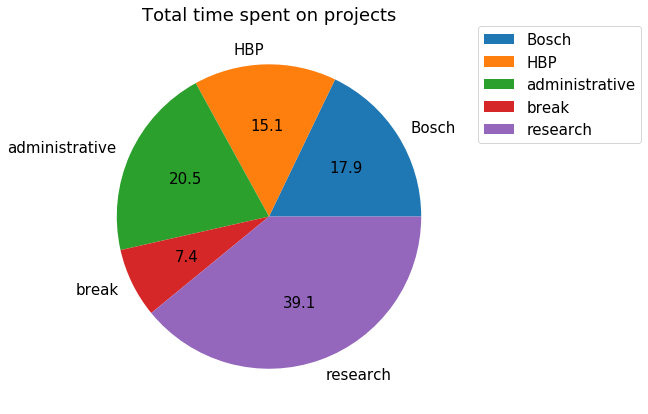

In [67]:
ax = project_total.plot.pie(y='Decimal Duration', autopct='%.1f')
ax.set_title('Total time spent on projects')
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Time spent on projects every month

In [73]:
projects = time_entries['Project'].unique()
tasks = time_entries['Task'].unique()
start = time_entries.iloc[0]['Start']
end = time_entries.iloc[-1]['End']
print("Tracking period from {} to {}".format(start, end))

Tracking period from 2016-03-14 05:01:00 to 2020-03-13 11:00:00


In [120]:
def get_time_spent_per(time_unit):
    plt_time_index = pd.date_range(start, end, freq = time_unit)
    range_df = pd.DataFrame(plt_time_index, columns=['Start'])
    range_df['End'] = range_df['Start'].shift(-1)
    range_df = range_df.iloc[:-1] # drop last range

    series = [ time_entries.loc[(time_entries['Start'] > row['Start']) & (time_entries['End'] < row['End'])]\
        .groupby('Project')['Decimal Duration'].sum()
     for _, row in range_df.iterrows() ]
    organized_durations = pd.DataFrame(series, index=range_df['Start']).fillna(0)
    return organized_durations

Average hours/month: 176.0322695035461


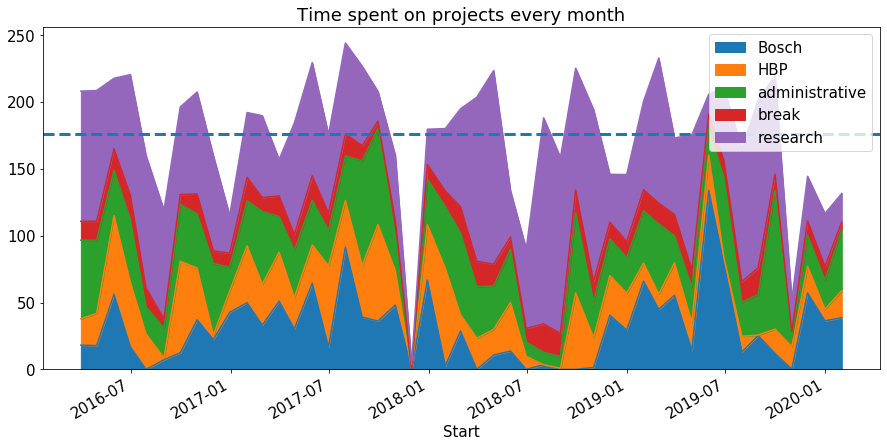

In [121]:
df_month = get_time_spent_per("BM")
ax = df_month.plot.area(title="Time spent on projects every month")
average_hours_per_month = df_month.mean().sum()
print("Average hours/month: {}".format(average_hours_per_month))
ax.axhline(average_hours_per_month, linestyle="--", linewidth=3)

# Time spent on projects every week


Average hours/week: 40.173993558776175


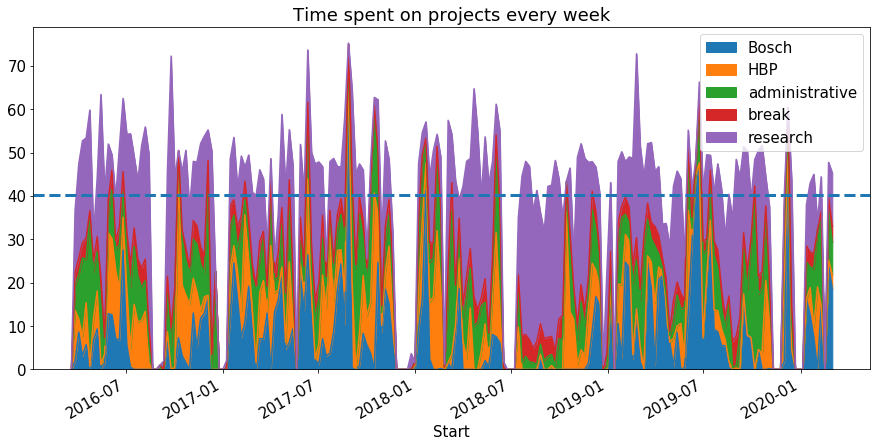

In [122]:
df_week = get_time_spent_per("W")
ax = df_week.plot.area(title="Time spent on projects every week")
average_hours_per_week = df_week.mean().sum()
print("Average hours/week: {}".format(average_hours_per_week))
ax.axhline(average_hours_per_week, linestyle="--", linewidth=3)